# Figures in Python

Making figures that visualize your data is one of the most important tools in Python.

Here, we look at a few ways of visualizing data using the library Matplotlib. For specifically statistics I can also reccomment the Seaborn package. 

In [1]:
import numpy as np # for array operation and maths
import matplotlib.pyplot as plt # for figures
import matplotlib
import sys
# !!! Replace W:\Work\Documents\GEOF_UiB\Python with the path 
# on YOUR PC !!! 
# One clean way to do this is to locate your EkteDataFunk.py-file, 
# right-click it, and use the 'Copy Path' command
sys.path.append(r"W:\Work\Documents\GEOF_UiB\Python")
from EkteDataFunk import loadData # to load data

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Load the dataset of temperature in Bergen since 1960.

In [4]:
file='TempBergenYearlyNonan.txt'
temp,time = loadData(file)

#### Lineplot
We've already worked with line plots. For a function f(x), x is on the x-axis, and f(x) is on the y-axis, in our case, x is time and f(x) is temperature. 

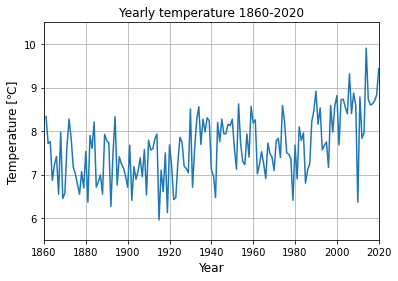

In [5]:
ax=plt.axes() # Make axes to plot in

# Plot the time series
ax.plot(time, temp)

# Define grid, labels etc.
ax.set(
    title='Yearly temperature 1860-2020',
    xlabel='Year',
    ylabel='Temperature [\u2103]', 
    xlim=[1860,2020], # limit the x-axis
    ylim=[5.5,10.5] # limit the y-axis
) 
ax.grid() # add a grid in the background
plt.show() 

There are lots of options when making figures. All colors, font size, figure size, axes, limits, labels on axis etc. can be changed. We touched upon this briefly in the exercise [Documentation and erors](https://github.com/julienweihs/GEOF/blob/main/Jupyter/Part7_Documentation_and_errors.ipynb). 

To figure out how to change something, google the function and whatever you want to change. 

Let's say that you want the line to be orange instead of blue, and to show all data points with a red star with black border. Google, e.g., "plt.plot line color python", and press the result that sends you to matplotlib's documentation pages, in this case, [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). This is a long page of documentation - it takes some practice to know where to look for the information you're after. In this case, I'd scroll down to "other paramters". Under ** kwargs, i.e., keyword arguments, there's a long list of Properties and their keywords. `color` is an example of a property, while `green` is a keyword argument. You use this input like this: `plt.plot(tid,temp), color='green')`. This gives a green line. `color='green'` is a "keyword argument pair". 

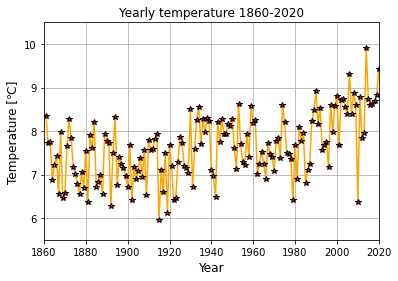

In [7]:
ax=plt.axes()

# Plot the time series and define how the line should look
ax.plot(
    tid,temp,
    color='orange',
    marker='*',
    markerfacecolor='red',
    markeredgecolor='k' # 'k' stands for black
)

# Define grid, labels etc.
ax.set(
    title='Yearly temperature 1860-2020',
    xlabel='Year',
    ylabel='Temperature [\u2103]', 
    xlim=[1860,2020], # limit the x-axis
    ylim=[5.5,10.5] # limit the y-axis
) 
ax.grid() # add a grid in the background
plt.show() 

### Exercise 1: 
Make a similar figure to the one above, but use purple circles and remove the line. 

### Exercise 2:
Make the same figure as above, but make the title larger. This requires a new seach in the documentation. Hint: Include "title", "fontsize", and "matplotlib" in the search words. Select new colors, markers and line style. 

## Histogram

*Note: matplotlib is useful to get an impression of the distribution, but if you want to make a nice figure with maybe just the probability density and not the bars, I'd suggest using the Seaborn package.*

Histograms show you which values are most common, and the probablility to get extreme values. 
Very simply, the code can look like this: 

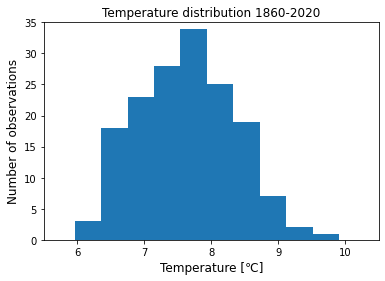

In [9]:
ax=plt.axes()
ax.hist(temp)
ax.set(
    title='Temperature distribution 1860-2020',
    ylabel='Number of observations',
    xlabel='Temperature [\u2103]', 
    xlim=[5.5,10.5], # limit the x-axis
    ylim=[0,35] # limit the y-axis
)
plt.show()

This is relatively bulky but gives a clear impression of the distribution. You can change the number of boxes (10 is default). Below there are 15 bins:

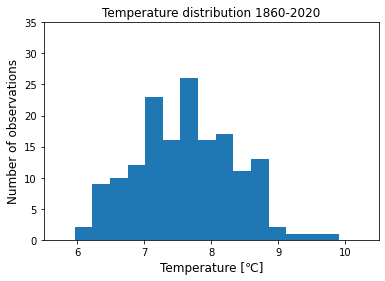

In [10]:
ax=plt.axes()
ax.hist(temp, bins=15)
ax.set(
    title='Temperature distribution 1860-2020',
    ylabel='Number of observations',
    xlabel='Temperature [\u2103]', 
    xlim=[5.5,10.5], # limit the x-axis
    ylim=[0,35] # limit the y-axis
)
plt.show()

This changes the impression of the distribution a bit, and gives some additional information in the two spikes that appears. The length of the time series (160 values), however, limits the usefulness of increasing the number of bins more. 

What if we load the same dataset but with monthly resolution instead? That will give us 12 times as many datapoints.   

In [12]:
# This is the same data set, but with monthly means. 
file='TempBergen.txt'
temp,time = loadData(file)
temp.shape


(161, 12)

temp.shape shows us that the data set is structured with year along the rows and month along the columns. If we plot the histogram of this directly, we get 12 overlapping histograms, which is not what we wanted - we wanted the histogram above but with higher resolution. Note that an improved version of the histogram below could be useful to compare the distribution between the months. 

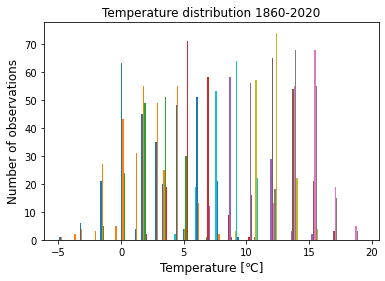

In [16]:
ax=plt.axes()
ax.hist(temp, bins=15)
ax.set(
    title='Temperature distribution 1860-2020',
    ylabel='Number of observations',
    xlabel='Temperature [\u2103]', 
)
plt.show()

We want to reshape the data set so that it's one long time series. We use the function `reshape` which has the syntax `np.reshape(x, shape)` where `x` is the variable, and `shape` is the shape you want. It's important that the new shape you assign fits the number of values in the original array. 

In [21]:
temp_vec=np.reshape(temp,(12*len(temp),)) 
temp_vec.shape, temp.shape, 161*12


((1932,), (161, 12), 1932)

Note now that temp_vec.shape=1932, which equals 161*12 which was the dimension of the original array. Since we just wanted a vector we could also have used the function `flatten()`. The figure below shows that the results are the same:


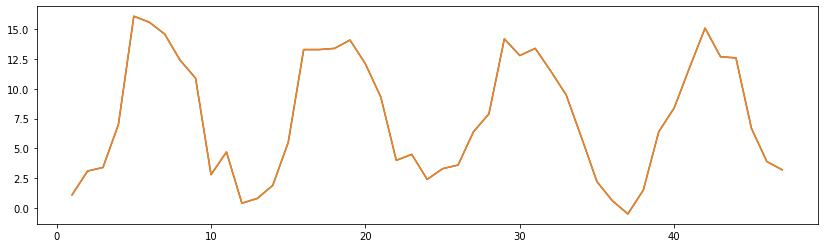

In [53]:
plt.figure(figsize=(14, 4))
plt.plot(temp.flatten()[:4*12])
plt.plot(temp_vec[:4*12])

### Exercise 3:

Make a histogram of `temp_vec`. Label the mean, median, and +\- one standard deviation using the function `plt.vlines()`. Why do you think there are two peaks? Make a figure that helps you explain what you think is the reason. 

### Exercise 4:
Make the histogram look good - change the colors, number of bins, edgecolor, binwidth etc. The documentation you need is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html). Pressing `Patch` under **kwargs gives you more information.
Optionally, try to add a best-fit line. 

Plot the first half of the time period in one color and the second period in another color to check if the distribution has changed. 

Consider the differences between the histogram when using yearly vs. monthly data - they're quite different, and draws the attention to different features. So what's the most useful choice depends on what you're discussing. 


## Scatterplot
If you've got two different variables and want to figure out if they're related it's often a good idea to plot the data as time series and as *scatter plots*. In a scatter plot the value of one variable is along the x-axis and the value of the other variable is along the y-axis, and a marker is plotted for every time step. A time series is consequently a type of scatterplot where time is along the x-axis. We're just not used to thinking of time as a variable because it increases steadily. But the idea is the same. In oceanography the TS-diagram is a very common scatterplot where salinity is along the x-axis and temperature is along the y-axis. 

Here, we load a dataset of precipitation to compare with temperature. Let temperature be along the x-axis and precipitation along the y-axis. Make a dot at every time step. 

Note that the two arrays have to have the same shape. Since we only have precipitation data since 1899 we cut the temperature array so that the two time series cover the same years. 

In [54]:
file='PrecipVestlandYearlyNonan.txt'
precip, time_p = loadData(file)

file='TempBergenYearlyNonan.txt'
temp, time_t = loadData(file)

In [56]:
print(time_p[0])
print(time_p[-1])
print(time_t[0])
print(time_t[-1])

start=np.nonzero(time_t==time_p[0]) # Find the indes where time_t equals the first year in time_p
start=start[0][0] # include [0][0] to get just the actual value. 

temp=temp[start:] # Delete the start of the temperature time series.
time_t=time_t[start:]


1899.0
2020.0
1899.0
2020.0


In [57]:

# Check that the time periods are now the same
print(time_p[0])
print(time_p[-1])
print(time_t[0])
print(time_t[-1])

1899.0
2020.0
1899.0
2020.0


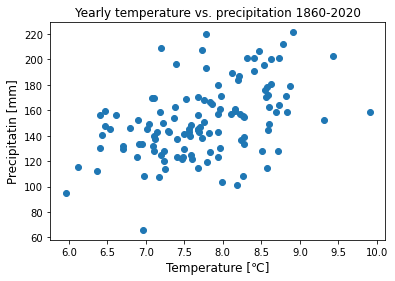

In [58]:
ax=plt.axes()
ax.scatter(temp,precip)
ax.set(
    title='Yearly temperature vs. precipitation 1860-2020',
    xlabel='Temperature [\u2103]',
    ylabel='Precipitatin [mm]', 
) 
plt.show()

### Exercise 6:
Do you see a pattern between temperature and precipitation. Does it agree with what you would expect?

Since precipitation and temperature have different units it could be useful to normalize the time series to get a better impression of the degree of variability. When plotted as above, without normalization, it could be that the relative variation in e.g., temperature is much larger than in precipitation, but we do not know. 

### Exercise 7: 
Normalize the time series and make the figure again. 
Hint: `(x-mean(x))/std(x)`


Sometimes it's useful to color code the dots. In this case we have the variables temperature and precipitation, but they're both a function of time, so we could color code the dots with the time stamp. 

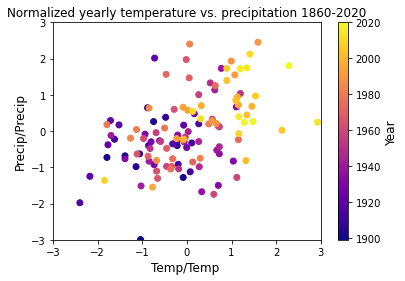

In [69]:
from matplotlib import cm # This package is needed to create the colormap
cmap=cm.get_cmap('plasma',len(temp)) # cmap means "colormap". Here, you define which colors you want to use.  
ax.axis('equal')
colors = time_t # Specify that the colors should be defined by the time vector.
ax=plt.axes()

# I want to plot temp and precip as normalized values so I define them in two new variables
temp_n=(temp-np.mean(temp))/np.std(temp)
precip_n=(precip-np.mean(precip))/np.std(precip)

# In the line below, you plot precip as a function of temperature, and the values that define the color 
# is set to "time" as defined above. The colormap is set to 'plasma' as defined above. vmin and vmax sets
# the limits of the colors. 

# Notice that the variable sc is stored in the line below. This is so that the colorbar is related 
# to this information below
sc=ax.scatter(temp_n,precip_n,c=colors,cmap=cmap,vmin=min(time_t), vmax=max(time_t)) 
ax.set(
    title='Normalized yearly temperature vs. precipitation 1860-2020',
    xlabel='Temp/Temp ',
    ylabel='Precip/Precip',  
    xlim=(-3, 3),
    ylim=(-3, 3)
) 
plt.colorbar(sc, label='Year') # This line makes the colorbar show up at the right side of the plot
plt.show()

### Exercise 8: 
Purple dots are the start of the time series, and yellow dots are today. What does this figure show about the change in temp/precip?

It's up to you which variables are on the x- and y-axis and what is shown in the colors. The markers can also have different size depending on a variable, which can be very useful. It's, however, often a good idea to not try to show all the information at the same time. This often gets busy and difficult to interpret. But it's always a good idea to try some different solutions concerning colors, markers and size - default is not always the most useful. 

### Exercise 9: 
Modify the script above so that time is along the x-axis, temperature along the y-axis, and precipitation is shown in color. Choose a colormap you feel like fits precipitation (google colormap matplotlib). What do you see now? is there a system? Think of regression lines and distribution of color. 


### Exercise 10:
Recall if-statements and boolean indices. 
Make the same figure as before that has temp on the x-axis, precip on the y-axis and time in color. 
In the same figure, find a way 
- to plot all the markers with more rain than mean+std in blue, 
- and a red `x` everywhere the temperature is more than mean+std. 

Consider a different colormap than above for tidyness, e.g., `Greys`. 


In another figure, plot a red `x` on all the last 20 years to emphasize where we're at now.  

### Contour plot
The last type of visualization in this notbook is the "Filled contour" plot. The syntax is `plt.contourf(X,Y,Z)`, where X is the x-coordinate, Y is the y-coordinate, and Z is the variable that is shown in color. This is a good way to display 2D data, e.g. if you have spatial data, transect data, or dapth data in time. 

In this example we've got time along both the x (month) and y axis (year), and temperature as the colored variable. 

In [90]:
file='TempVestlandMonthly.txt'
temp,time = loadData(file)

# array for the months
month=np.linspace(1,12,12)


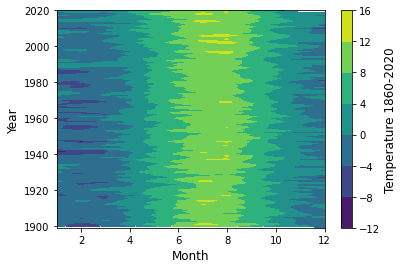

In [96]:
ax=plt.axes()
# Just as with the scatterplot above which we saved as "sc" so that we could pass is to the colorbar, 
# we save the contourf information as "c"
c=ax.contourf(month,time,temp,)
cbar=plt.colorbar(c)
cbar.set_label('Temperature 1860-2020')
ax.set(
    ylabel='Year',
    xlabel='Month')
plt.show()

### Exercise 6:

Blue and green aren't the most intuitive colors to describe temperature. Assign a different colormap to the contourf plot. Follow this [link](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and choose a colormap you like better. Change `cmapX` in the code below with the name of the colormap you've chosen.

In [ ]:
ax=plt.axes()
cmap=cm.get_cmap('cmapX') # change cmapX here to what you want.
c=ax.contourf(
    month,time,temp,
    cmap=cmap, # Here you assign your chosen colormap to the plot. 
    levels=15 # Here you assign how many colors you want to use. 
) 
cbar=plt.colorbar(c)
cbar.set_label('Temperature 1860-2020')
ax.set(
    ylabel='Year',
    xlabel='Month'
)
plt.show()

#### Note: 
Choosing the correct colormap is its own science. 
- Be aware that Sequential colormaps are recommended since they do not greate artificial strong boundaries between values. 
- If you want to mark a specific value it's better to combine `plt.contourf()` with `plt.contour()` (note the missing "f"). 
- Setting limits to the colorvalues is also important, especially if you want to compare different plots. Then it's important that the colors show the same values in the different panels. 